<a href="https://colab.research.google.com/github/boramdv/TIL/blob/master/201_DNN_mnist_Categorical_Classification_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Categorical Classification

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [33]:
# GPU 설정 확인

tf.test.gpu_device_name()

'/device:GPU:0'

In [34]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [36]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


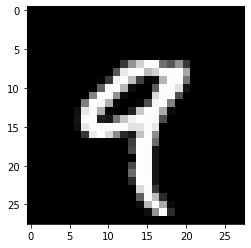

In [37]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [38]:
import numpy as np
np.set_printoptions(linewidth = 150)  # 1픽셀 데이터 약 4 cha

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [39]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [40]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [41]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [42]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [43]:
# Model Define
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [44]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [45]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [46]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.2598 - accuracy: 0.9201 - val_loss: 0.1170 - val_accuracy: 0.9647
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0964 - accuracy: 0.9708 - val_loss: 0.1004 - val_accuracy: 0.9697
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0606 - accuracy: 0.9811 - val_loss: 0.0903 - val_accuracy: 0.9740
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0916 - val_accuracy: 0.9761
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.1142 - val_accuracy: 0.9716
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.1057 - val_accuracy: 0.9767
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.1019 - val_accuracy: 0.9803

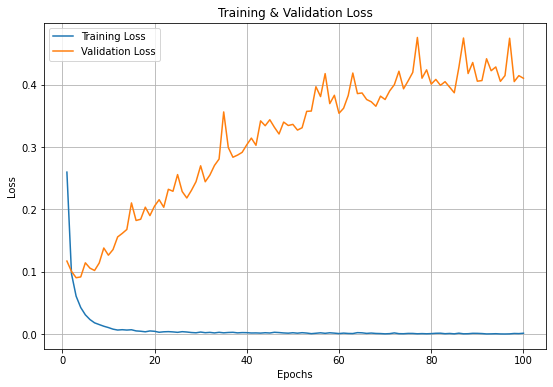

In [47]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [48]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.9817
Loss = 0.33003
Accuracy = 0.98170


In [49]:
np.set_printoptions(suppress = True, precision = 9)
print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [50]:
print(mnist.predict_classes(X_test[:1,:]))

[7]


## L2 Regularization

In [51]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist_l2 = models.Sequential()
mnist_l2.add(layers.Dense(512, activation = 'relu',
                          kernel_regularizer = regularizers.l2(0.00001),
                          input_shape = (28 * 28, )))
mnist_l2.add(layers.Dense(256, activation = 'relu',
                          kernel_regularizer = regularizers.l2(0.00001)))
mnist_l2.add(layers.Dense(10, activation = 'softmax'))

In [52]:
mnist_l2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [53]:
mnist_l2.compile(loss = 'categorical_crossentropy',
                 optimizer = 'rmsprop',
                 metrics = ['accuracy'])

In [54]:
%%time

Hist_mnist_l2 = mnist_l2.fit(X_train, y_train,
                             epochs = 100,
                             batch_size = 128,
                             validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2619 - accuracy: 0.9229 - val_loss: 0.1388 - val_accuracy: 0.9592
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1024 - accuracy: 0.9713 - val_loss: 0.0979 - val_accuracy: 0.9723
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9809 - val_loss: 0.0924 - val_accuracy: 0.9762
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0547 - accuracy: 0.9857 - val_loss: 0.1016 - val_accuracy: 0.9752
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9890 - val_loss: 0.0906 - val_accuracy: 0.9791
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9916 - val_loss: 0.1102 - val_accuracy: 0.9759
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9931 - val_loss: 0.1121 - val_accuracy: 0.9767

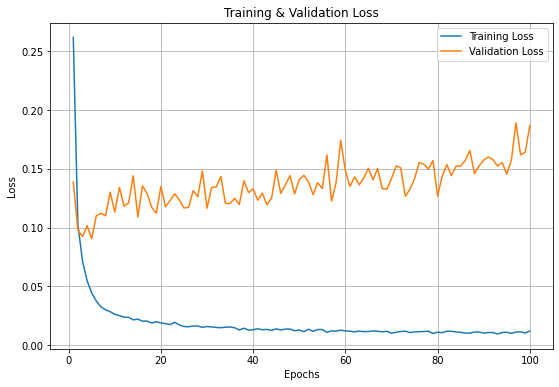

In [55]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_l2.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist_l2.history['loss'])
plt.plot(epochs, Hist_mnist_l2.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [67]:
loss, accuracy = mnist_l2.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1794 - accuracy: 0.9741
Loss = 0.17939
Accuracy = 0.97410


## Dropout

In [56]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist_do = models.Sequential()
mnist_do.add(layers.Dense(512, activation = 'relu',input_shape = (28 * 28, )))
mnist_do.add(layers.Dropout(0.4))
mnist_do.add(layers.Dense(256, activation = 'relu'))
mnist_do.add(layers.Dropout(0.2))
mnist_do.add(layers.Dense(10, activation = 'softmax'))

In [57]:
mnist_do.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [58]:
mnist_do.compile(loss = 'categorical_crossentropy',
                 optimizer = 'rmsprop',
                 metrics = ['accuracy'])

In [59]:
%%time

Hist_mnist_do = mnist_do.fit(X_train, y_train,
                             epochs = 100,
                             batch_size = 128,
                             validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3254 - accuracy: 0.9007 - val_loss: 0.1346 - val_accuracy: 0.9597
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1462 - accuracy: 0.9563 - val_loss: 0.1052 - val_accuracy: 0.9688
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9673 - val_loss: 0.0952 - val_accuracy: 0.9719
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9718 - val_loss: 0.0936 - val_accuracy: 0.9725
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9768 - val_loss: 0.0872 - val_accuracy: 0.9775
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0719 - accuracy: 0.9783 - val_loss: 0.0819 - val_accuracy: 0.9783
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0836 - val_accuracy: 0.9797

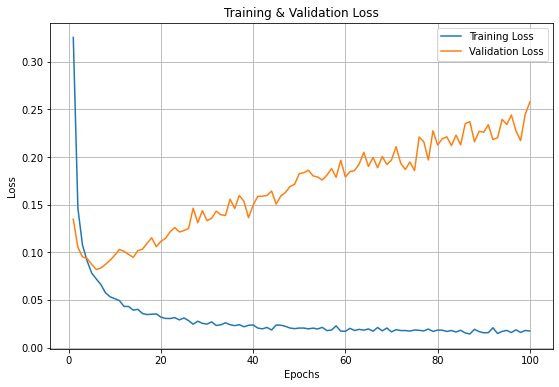

In [60]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_do.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist_do.history['loss'])
plt.plot(epochs, Hist_mnist_do.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [68]:
loss, accuracy = mnist_do.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9833
Loss = 0.19603
Accuracy = 0.98330


## Batch Normalization

In [61]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist_bn = models.Sequential()
mnist_bn.add(layers.Dense(512, input_shape=(28 * 28, )))
mnist_bn.add(layers.BatchNormalization())
mnist_bn.add(layers.Activation('relu'))
mnist_bn.add(layers.Dense(256))
mnist_bn.add(layers.BatchNormalization())
mnist_bn.add(layers.Activation('relu'))
mnist_bn.add(layers.Dense(10, activation = 'softmax'))

In [62]:
mnist_bn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [63]:
mnist_bn.compile(loss = 'categorical_crossentropy',
                 optimizer = 'rmsprop',
                 metrics = ['accuracy'])

In [64]:
%%time

Hist_mnist_bn = mnist_bn.fit(X_train, y_train,
                             epochs = 100,
                             batch_size = 128,
                             validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.1796 - accuracy: 0.9456 - val_loss: 0.1051 - val_accuracy: 0.9690
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9771 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0864 - val_accuracy: 0.9763
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0866 - val_accuracy: 0.9770
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0887 - val_accuracy: 0.9767
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0921 - val_accuracy: 0.9772
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0973 - val_accuracy: 0.9768

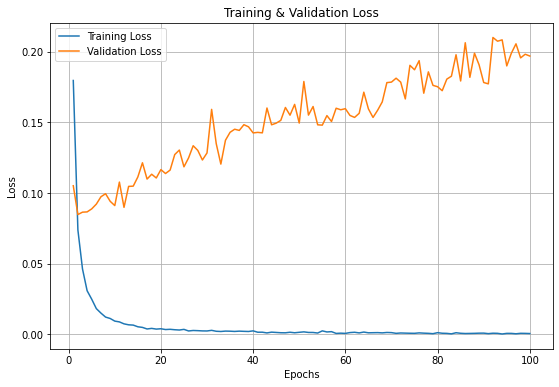

In [65]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_bn.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist_bn.history['loss'])
plt.plot(epochs, Hist_mnist_bn.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [69]:
loss, accuracy = mnist_bn.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1758 - accuracy: 0.9832
Loss = 0.17579
Accuracy = 0.98320


## L2 Regularization & Dropout

In [70]:
# Model Define - L2 Regularization & Dropout
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist_dl2 = models.Sequential()
mnist_dl2.add(layers.Dense(512, activation = 'relu',
                          kernel_regularizer = regularizers.l2(0.00001),
                          input_shape = (28 * 28, )))
mnist_dl2.add(layers.Dropout(0.4))
mnist_dl2.add(layers.Dense(256, activation = 'relu',
                          kernel_regularizer = regularizers.l2(0.00001)))
mnist_dl2.add(layers.Dropout(0.2))
mnist_dl2.add(layers.Dense(10, activation = 'softmax'))

In [71]:
mnist_dl2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [72]:
mnist_dl2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [73]:
%%time

Hist_mnist_dl2 = mnist_dl2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3305 - accuracy: 0.9011 - val_loss: 0.1486 - val_accuracy: 0.9594
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1542 - accuracy: 0.9559 - val_loss: 0.1187 - val_accuracy: 0.9667
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1234 - accuracy: 0.9660 - val_loss: 0.1126 - val_accuracy: 0.9709
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1064 - accuracy: 0.9712 - val_loss: 0.0953 - val_accuracy: 0.9753
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0929 - accuracy: 0.9749 - val_loss: 0.1016 - val_accuracy: 0.9752
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0871 - accuracy: 0.9775 - val_loss: 0.0914 - val_accuracy: 0.9784
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9796 - val_loss: 0.0954 - val_accuracy: 0.9783

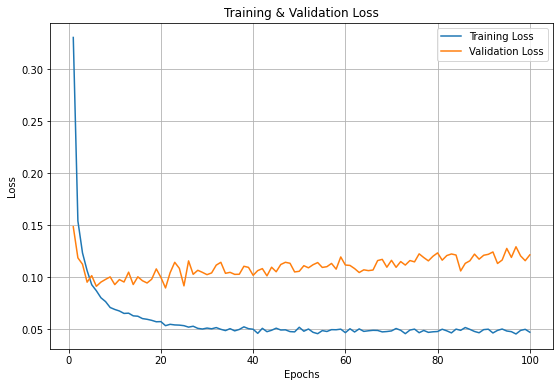

In [74]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_dl2.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist_dl2.history['loss'])
plt.plot(epochs, Hist_mnist_dl2.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [75]:
loss, accuracy = mnist_dl2.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1089 - accuracy: 0.9839
Loss = 0.10887
Accuracy = 0.98390


## Batch Normalization & L2 Regularization

In [76]:
# Model Define - Batch Normalization & L2 Regularization
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist_bl2 = models.Sequential()
mnist_bl2.add(layers.Dense(512, 
                           kernel_regularizer = regularizers.l2(0.00001),
                           input_shape = (28 * 28, )))
mnist_bl2.add(layers.BatchNormalization())
mnist_bl2.add(layers.Activation('relu'))
mnist_bl2.add(layers.Dense(256,
                           kernel_regularizer = regularizers.l2(0.00001)))
mnist_bl2.add(layers.BatchNormalization())
mnist_bl2.add(layers.Activation('relu'))
mnist_bl2.add(layers.Dense(10, activation = 'softmax'))

In [77]:
mnist_bl2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [78]:
mnist_bl2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [79]:
%%time

Hist_mnist_bl2 = mnist_bl2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.1900 - accuracy: 0.9443 - val_loss: 0.1069 - val_accuracy: 0.9690
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0819 - accuracy: 0.9776 - val_loss: 0.1021 - val_accuracy: 0.9733
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0590 - accuracy: 0.9844 - val_loss: 0.0985 - val_accuracy: 0.9746
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0451 - accuracy: 0.9889 - val_loss: 0.1065 - val_accuracy: 0.9734
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0369 - accuracy: 0.9916 - val_loss: 0.0935 - val_accuracy: 0.9793
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9938 - val_loss: 0.1008 - val_accuracy: 0.9762
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0288 - accuracy: 0.9944 - val_loss: 0.1181 - val_accuracy: 0.9729

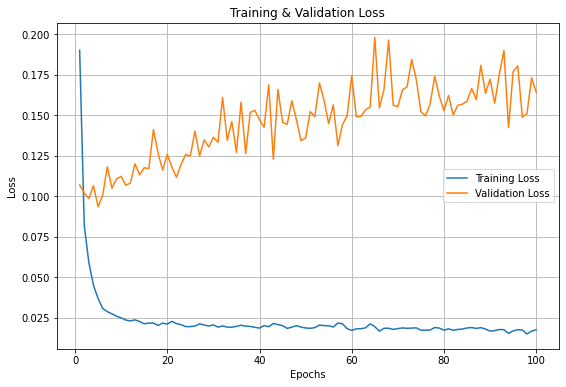

In [80]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_bl2.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist_bl2.history['loss'])
plt.plot(epochs, Hist_mnist_bl2.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [81]:
loss, accuracy = mnist_bl2.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1354 - accuracy: 0.9819
Loss = 0.13538
Accuracy = 0.98190


## Batch Normalization & Dropout

In [82]:
# Model Define - Batch Normalization & Dropout
from tensorflow.keras import models
from tensorflow.keras import layers

mnist_bd = models.Sequential()
mnist_bd.add(layers.Dense(512, input_shape = (28 * 28, )))
mnist_bd.add(layers.Dropout(0.4))
mnist_bd.add(layers.BatchNormalization())
mnist_bd.add(layers.Activation('relu'))
mnist_bd.add(layers.Dense(256))
mnist_bd.add(layers.Dropout(0.2))
mnist_bd.add(layers.BatchNormalization())
mnist_bd.add(layers.Activation('relu'))
mnist_bd.add(layers.Dense(10, activation = 'softmax'))

In [83]:
mnist_bd.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)              

In [84]:
mnist_bd.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [85]:
%%time

Hist_mnist_bd = mnist_bd.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.2877 - accuracy: 0.9140 - val_loss: 0.1467 - val_accuracy: 0.9590
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1467 - accuracy: 0.9559 - val_loss: 0.1167 - val_accuracy: 0.9641
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1165 - accuracy: 0.9645 - val_loss: 0.1061 - val_accuracy: 0.9669
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0951 - accuracy: 0.9705 - val_loss: 0.0989 - val_accuracy: 0.9697
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.0887 - val_accuracy: 0.9761
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0775 - accuracy: 0.9761 - val_loss: 0.0841 - val_accuracy: 0.9753
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0852 - val_accuracy: 0.9758

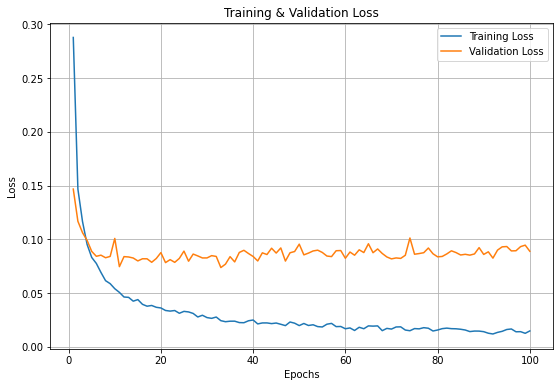

In [86]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_bd.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist_bd.history['loss'])
plt.plot(epochs, Hist_mnist_bd.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [87]:
loss, accuracy = mnist_bd.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

# 이 데이터에서 해당 조합이 Loss값이 가장 작음 (오버피팅 경향 가장 작음)

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9805
Loss = 0.07975
Accuracy = 0.98050
